# Problem 1. Regression

In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api

import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge


In [236]:
train_data = pd.read_csv("communities_train.csv")
val_data = pd.read_csv("communities_val.csv")
test_data = pd.read_csv("communities_test.csv")
print(train_data.shape)
print(val_data.shape)
print(test_data.shape)

# Remove spaces in column names
columns = {}
for old_col in train_data.columns:
    columns[old_col] = old_col.strip()

train_data.rename(columns=columns, inplace=True)
val_data.rename(columns=columns, inplace=True)
test_data.rename(columns=columns, inplace=True)
train_data.columns.to_list()




def split_data(df:pd.DataFrame) -> pd.DataFrame:
    col_to_predict = "ViolentCrimesPerPop"
    X_cols = df.columns.to_list()
    X_cols.remove(col_to_predict)
    X = df[X_cols]
    Y = df[col_to_predict]
    return X, Y
X_train, Y_train = split_data(train_data)
X_val, Y_val = split_data(val_data)
X_test, Y_test = split_data(test_data)


# Standarise data
scaler = StandardScaler()
scaler.fit(X_train)

s_X_train =pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
s_X_val =pd.DataFrame(scaler.transform(X_val), columns=X_val.columns, index=X_val.index)
s_X_test =pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)


# X_val = scaler.transform(X_val)
# X_test = scaler.transform(X_test)



print("========X,Y======")
print(X_train.shape)
print(Y_train.shape)

print(X_val.shape)
print(Y_val.shape)

print(X_test.shape)
print(Y_test.shape)




(298, 101)
(298, 101)
(299, 101)
========X,Y======
(298, 100)
(298,)
(298, 100)
(298,)
(299, 100)
(299,)


In [237]:
X_train["PersPerFam"].describe()

count    298.000000
mean       0.491443
std        0.166332
min        0.000000
25%        0.390000
50%        0.470000
75%        0.560000
max        1.000000
Name: PersPerFam, dtype: float64

Text(0.5, 1.0, 'Standardized')

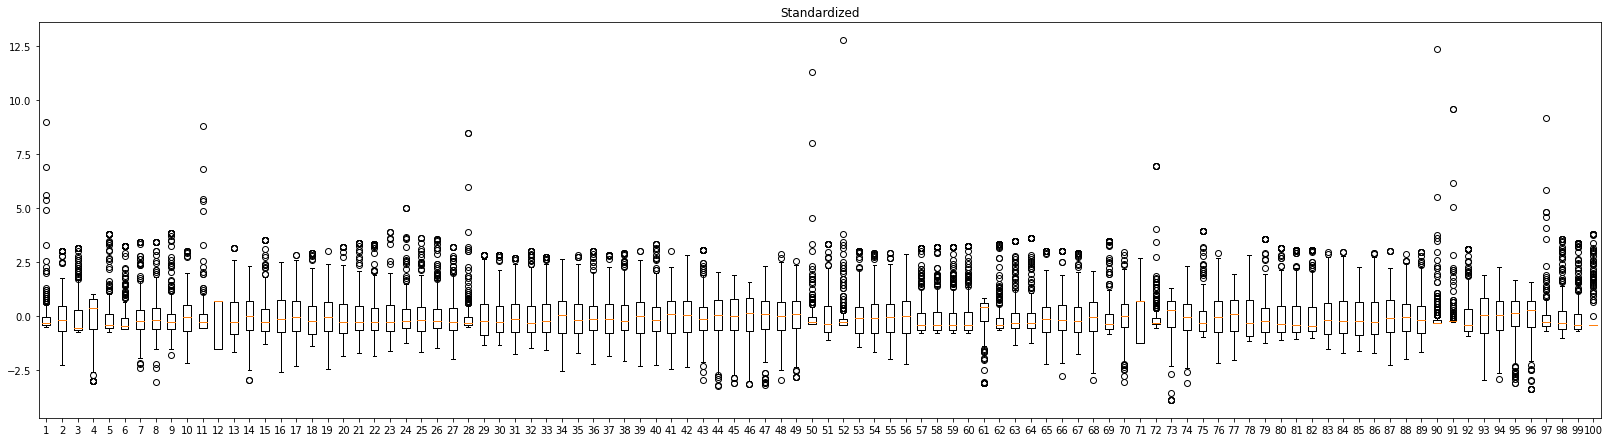

In [238]:
figure = plt.figure(figsize=[28,16])
axe = figure.add_subplot(2,1,1)
# axe.boxplot(X_train)
# axe.set_title("Original")

# axe = figure.add_subplot(2,1,2)
axe.boxplot(s_X_train)
axe.set_title("Standardized")



## Analyze Data Characteristics

### Correlation

In [240]:
X_train.describe()


,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,...,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,0.051174,0.470168,0.187550,0.740436,0.161846,0.155772,0.428523,0.494664,0.337752,0.428926,...,0.022047,0.227282,0.603624,0.540638,0.624631,0.652047,0.063389,0.237919,0.167013,0.092416
std,0.105366,0.174496,0.256605,0.247056,0.219377,0.259457,0.165588,0.147391,0.172498,0.189332,...,0.102258,0.249737,0.205289,0.180099,0.203376,0.194945,0.096778,0.213516,0.244250,0.237379
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.030000,0.050000,0.030000,0.020000,...,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000
25%,0.010000,0.350000,0.020000,0.592500,0.040000,0.010000,0.330000,0.410000,0.240000,0.300000,...,0.000000,0.060000,0.450000,0.430000,0.530000,0.560000,0.020000,0.110000,0.020000,0.000000
50%,0.020000,0.440000,0.050000,0.840000,0.075000,0.040000,0.395000,0.470000,0.290000,0.420000,...,0.000000,0.130000,0.620000,0.555000,0.660000,0.705000,0.040000,0.170000,0.065000,0.000000
75%,0.050000,0.550000,0.260000,0.940000,0.190000,0.140000,0.480000,0.550000,0.360000,0.530000,...,0.000000,0.310000,0.780000,0.670000,0.770000,0.790000,0.070000,0.290000,0.190000,0.000000
max,1.000000,1.000000,1.000000,0.990000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.950000,0.970000,0.960000,0.950000,1.000000,1.000000,1.000000


Text(0, 0.5, 'numbUrban')

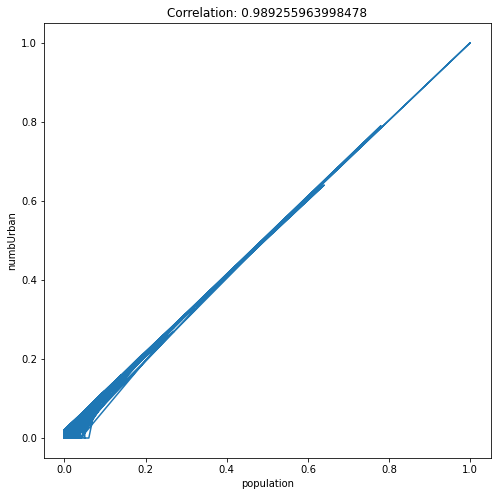

In [241]:
figure = plt.figure(figsize=[8,8])
axe = figure.add_subplot(1,1,1)
axe.plot(X_train["population"], X_train["numbUrban"])
axe.set_title(f'Correlation: {X_train["population"].corr(X_train["numbUrban"])}')
axe.set_xlabel("population")
axe.set_ylabel("numbUrban")




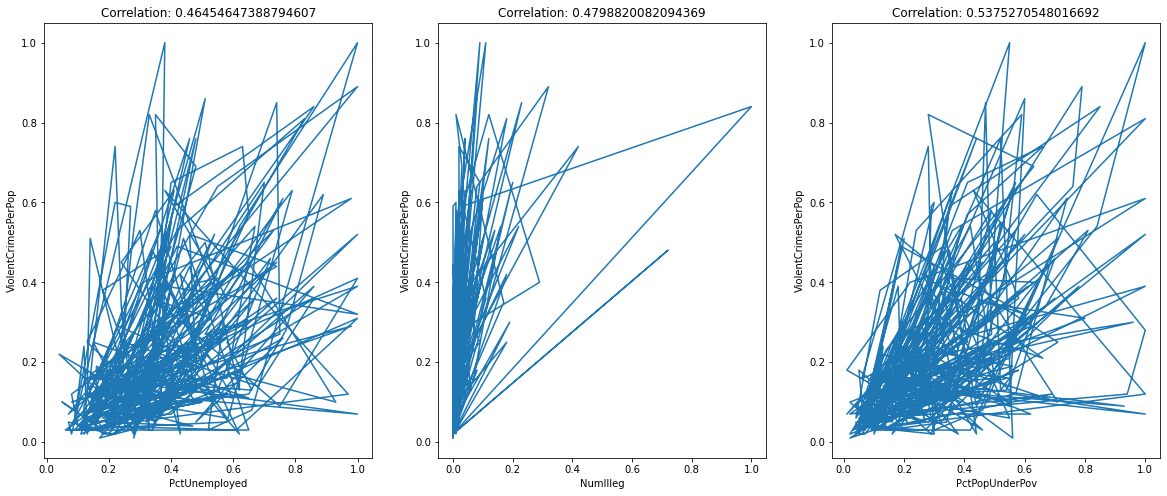

In [242]:
figure = plt.figure(figsize=[20,8])

def plot_corr(x_label, axe):
    axe.plot(X_train[x_label], Y_train)
    axe.set_title(f'Correlation: {X_train[x_label].corr(Y_train)}')
    axe.set_xlabel(x_label)
    axe.set_ylabel("ViolentCrimesPerPop")
axe = figure.add_subplot(1,3,1)
plot_corr("PctUnemployed", axe)

axe = figure.add_subplot(1,3,2)
plot_corr("NumIlleg", axe)

axe = figure.add_subplot(1,3,3)
plot_corr("PctPopUnderPov", axe)





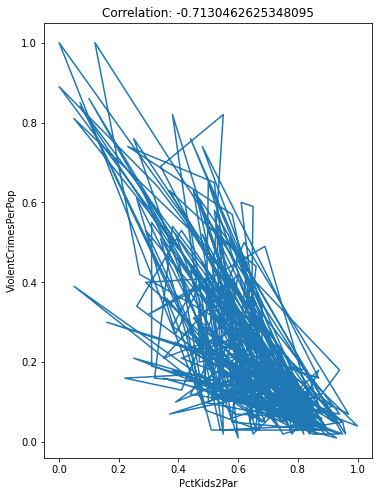

In [259]:
figure = plt.figure(figsize=[20,8])
axe = figure.add_subplot(1,3,1)
plot_corr("PctKids2Par", axe)

## Linear Regression

In [255]:
def compute_RMSE(predicted, actual):
    return np.sqrt(np.mean((predicted - actual)**2))

def eval_model(model, X_train, Y_train, X_val, Y_val, X_test, Y_test):
    fig = plt.figure(figsize=[25,16])
    ax = fig.add_subplot(3,1,1)
    accuracy = compute_RMSE(model.predict(X_train), Y_train)
    ax.set_title(f"Training Data RMSE: {accuracy}")
    ax.plot(Y_train,label="Actual")
    ax.plot(model.predict(X_train), label="Predicted")
    ax.legend()

    ax = fig.add_subplot(3,1,2)
    accuracy = compute_RMSE(model.predict(X_val), Y_val)
    ax.set_title(f"Validation Data RMSE: {accuracy}")
    ax.plot(Y_val,label="Actual")
    ax.plot(model.predict(X_val), label="Predicted")
    ax.legend()

    ax = fig.add_subplot(3,1,3)
    accuracy = compute_RMSE(model.predict(X_test), Y_test)
    ax.set_title(f"Test Data RMSE: {accuracy}")
    ax.plot(Y_val,label="Actual")
    ax.plot(model.predict(X_val), label="Predicted")
    ax.legend()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared (uncentered):                   0.346
Model:                             OLS   Adj. R-squared (uncentered):              0.016
Method:                  Least Squares   F-statistic:                              1.048
Date:                 Mon, 25 Apr 2022   Prob (F-statistic):                       0.386
Time:                         07:11:45   Log-Likelihood:                         -14.711
No. Observations:                  298   AIC:                                      229.4
Df Residuals:                      198   BIC:                                      599.1
Df Model:                          100                                                  
Covariance Type:             nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
population                0.0988      0.313      0.315      0.753      -0.519       0.717
householdsize            -0.0767      0.119     -0.646      0.519      -0.311       0.158
racepctblack              0.0102      0.098      0.104      0.917      -0.183       0.203
racePctWhite             -0.0260      0.095     -0.274      0.784      -0.214       0.161
racePctAsian             -0.0185      0.050     -0.371      0.711      -0.117       0.080
racePctHisp              -0.0982      0.097     -1.012      0.313      -0.290       0.093
agePct12t21              -0.0398      0.127     -0.313      0.755      -0.290       0.211
agePct12t29               0.1069      0.174      0.614      0.540      -0.236       0.450
agePct16t24              -0.0256      0.214     -0.120      0.905      -0.447       0.396
agePct65up                0.0216      0.125      0.173      0.863      -0.225       0.268
numbUrban                -0.0957      0.304     -0.314      0.753      -0.696       0.504
pctUrban                  0.0341      0.051      0.664      0.508      -0.067       0.135
medIncome                -0.0829      0.305     -0.271      0.786      -0.685       0.519
pctWWage                 -0.0467      0.117     -0.397      0.691      -0.278       0.185
pctWFarmSelf              0.0118      0.030      0.388      0.698      -0.048       0.072
pctWInvInc               -0.0397      0.090     -0.444      0.658      -0.216       0.137
pctWSocSec                0.0381      0.137      0.278      0.781      -0.232       0.308
pctWPubAsst               0.0238      0.083      0.287      0.775      -0.140       0.187
pctWRetire               -0.0193      0.043     -0.451      0.653      -0.104       0.065
medFamInc                 0.1037      0.267      0.388      0.699      -0.424       0.631
perCapInc                 0.1265      0.288      0.439      0.661      -0.442       0.695
whitePerCap              -0.1154      0.231     -0.500      0.618      -0.570       0.340
blackPerCap               0.0027      0.032      0.085      0.933      -0.060       0.065
indianPerCap             -0.0123      0.022     -0.553      0.581      -0.056       0.032
AsianPerCap               0.0207      0.028      0.729      0.467      -0.035       0.077
OtherPerCap              -0.0065      0.025     -0.259      0.796      -0.056       0.043
HispPerCap                0.0091      0.032      0.285      0.776      -0.054       0.072
NumUnderPov              -0.0283      0.112     -0.254      0.800      -0.248       0.192
PctPopUnderPov           -0.0739      0.121     -0.613      0.540      -0.312       0.164
PctLess9thGrade          -0.0442      0.119     -0.371      0.711      -0.279       0.191
Pct

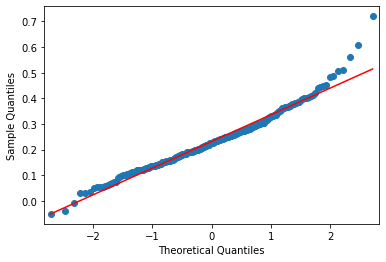

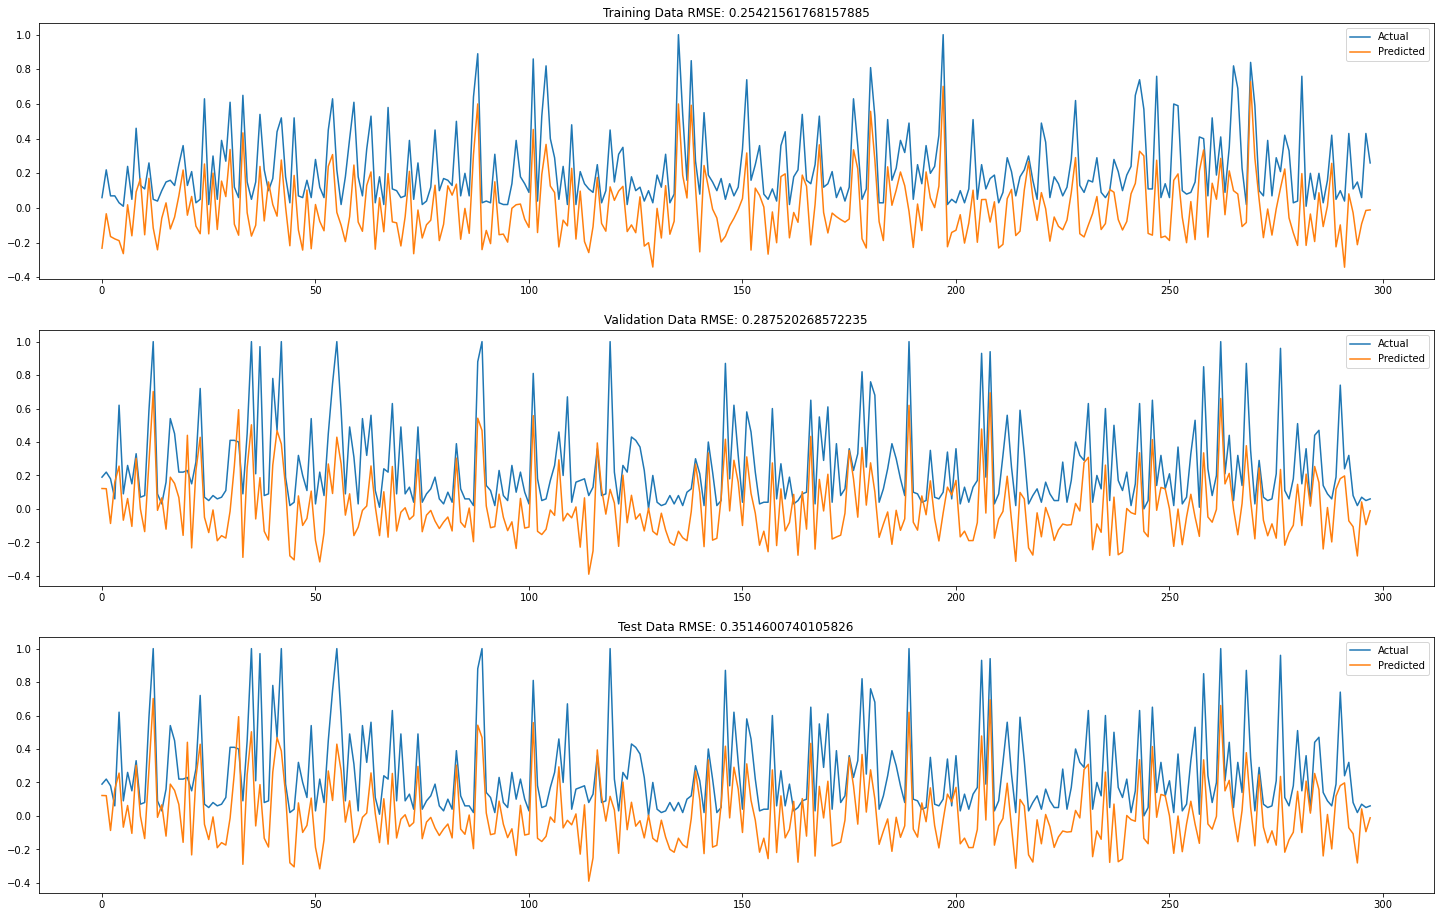

In [258]:
linear_model = sm.OLS(Y_train, s_X_train).fit()
f = statsmodels.api.qqplot(linear_model.resid, line="s")

eval_model(linear_model, s_X_train,Y_train, s_X_val, Y_val, X_test, Y_test)
linear_model.summary()


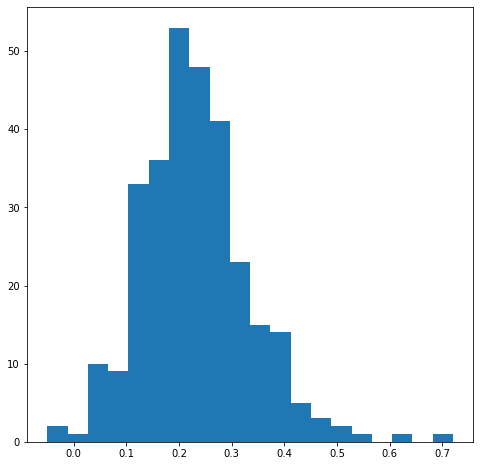

In [244]:
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(1, 1, 1)
ax.hist(linear_model.resid, 20);

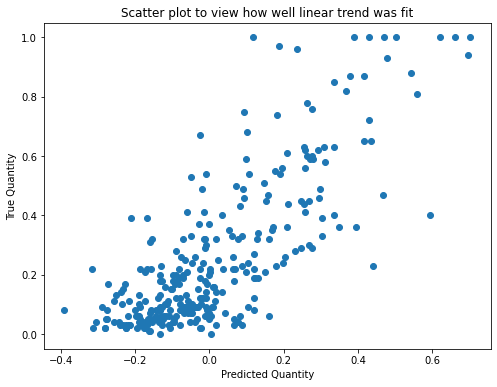

In [245]:
fig, ax = plt.subplots(figsize=(8,6))
plt.scatter(linear_model.predict(s_X_val), Y_val)
plt.title('Scatter plot to view how well linear trend was fit')
plt.xlabel('Predicted Quantity')
plt.ylabel('True Quantity')
plt.show()

In [246]:
X_train.columns

Index(['population', 'householdsize', 'racepctblack', 'racePctWhite',
       'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29',
       'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome',
       'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst',
       'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap',
       'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap',
       'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad',
       'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu',
       'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce',
       'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam',
       'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par',
       'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig',
       'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10',
       'PctRecentImmig', 'PctRecImmig5', 'PctRecI

/tmp/ipykernel_6027/1894591593.py:18: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  clf = Lasso(alpha=lambd).fit(X=X_train, y=Y_train)
/opt/conda/envs/cab420-env/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/conda/envs/cab420-env/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.625e+00, tolerance: 1.343e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordin

Best values on Validation Data set
best lambda: 0.001
Best val RMSE: 0.14317807646797276
bets coefficients: [ 0.         -0.01905679  0.00889661 -0.01011219  0.         -0.05465222
 -0.          0.00207792  0.00746578  0.00570754  0.          0.01358994
  0.         -0.00923695  0.00115669 -0.01840125  0.01790579  0.00228028
 -0.02059549  0.          0.          0.          0.         -0.00575238
  0.02035257  0.00044077  0.01167324 -0.         -0.03587318 -0.
  0.          0.00015645 -0.01573938  0.03204033 -0.01769154 -0.
 -0.          0.         -0.00158025  0.         -0.00129165 -0.
  0.         -0.         -0.06479293 -0.00762647 -0.          0.01462629
 -0.02638966  0.01091012  0.03441124 -0.00565509 -0.01243771 -0.00826077
 -0.          0.01722813 -0.         -0.          0.          0.
 -0.          0.          0.00730959  0.          0.03415764 -0.01663506
  0.         -0.01990157  0.06017723  0.          0.          0.01158204
 -0.00967475 -0.          0.01865696 -0.00994502

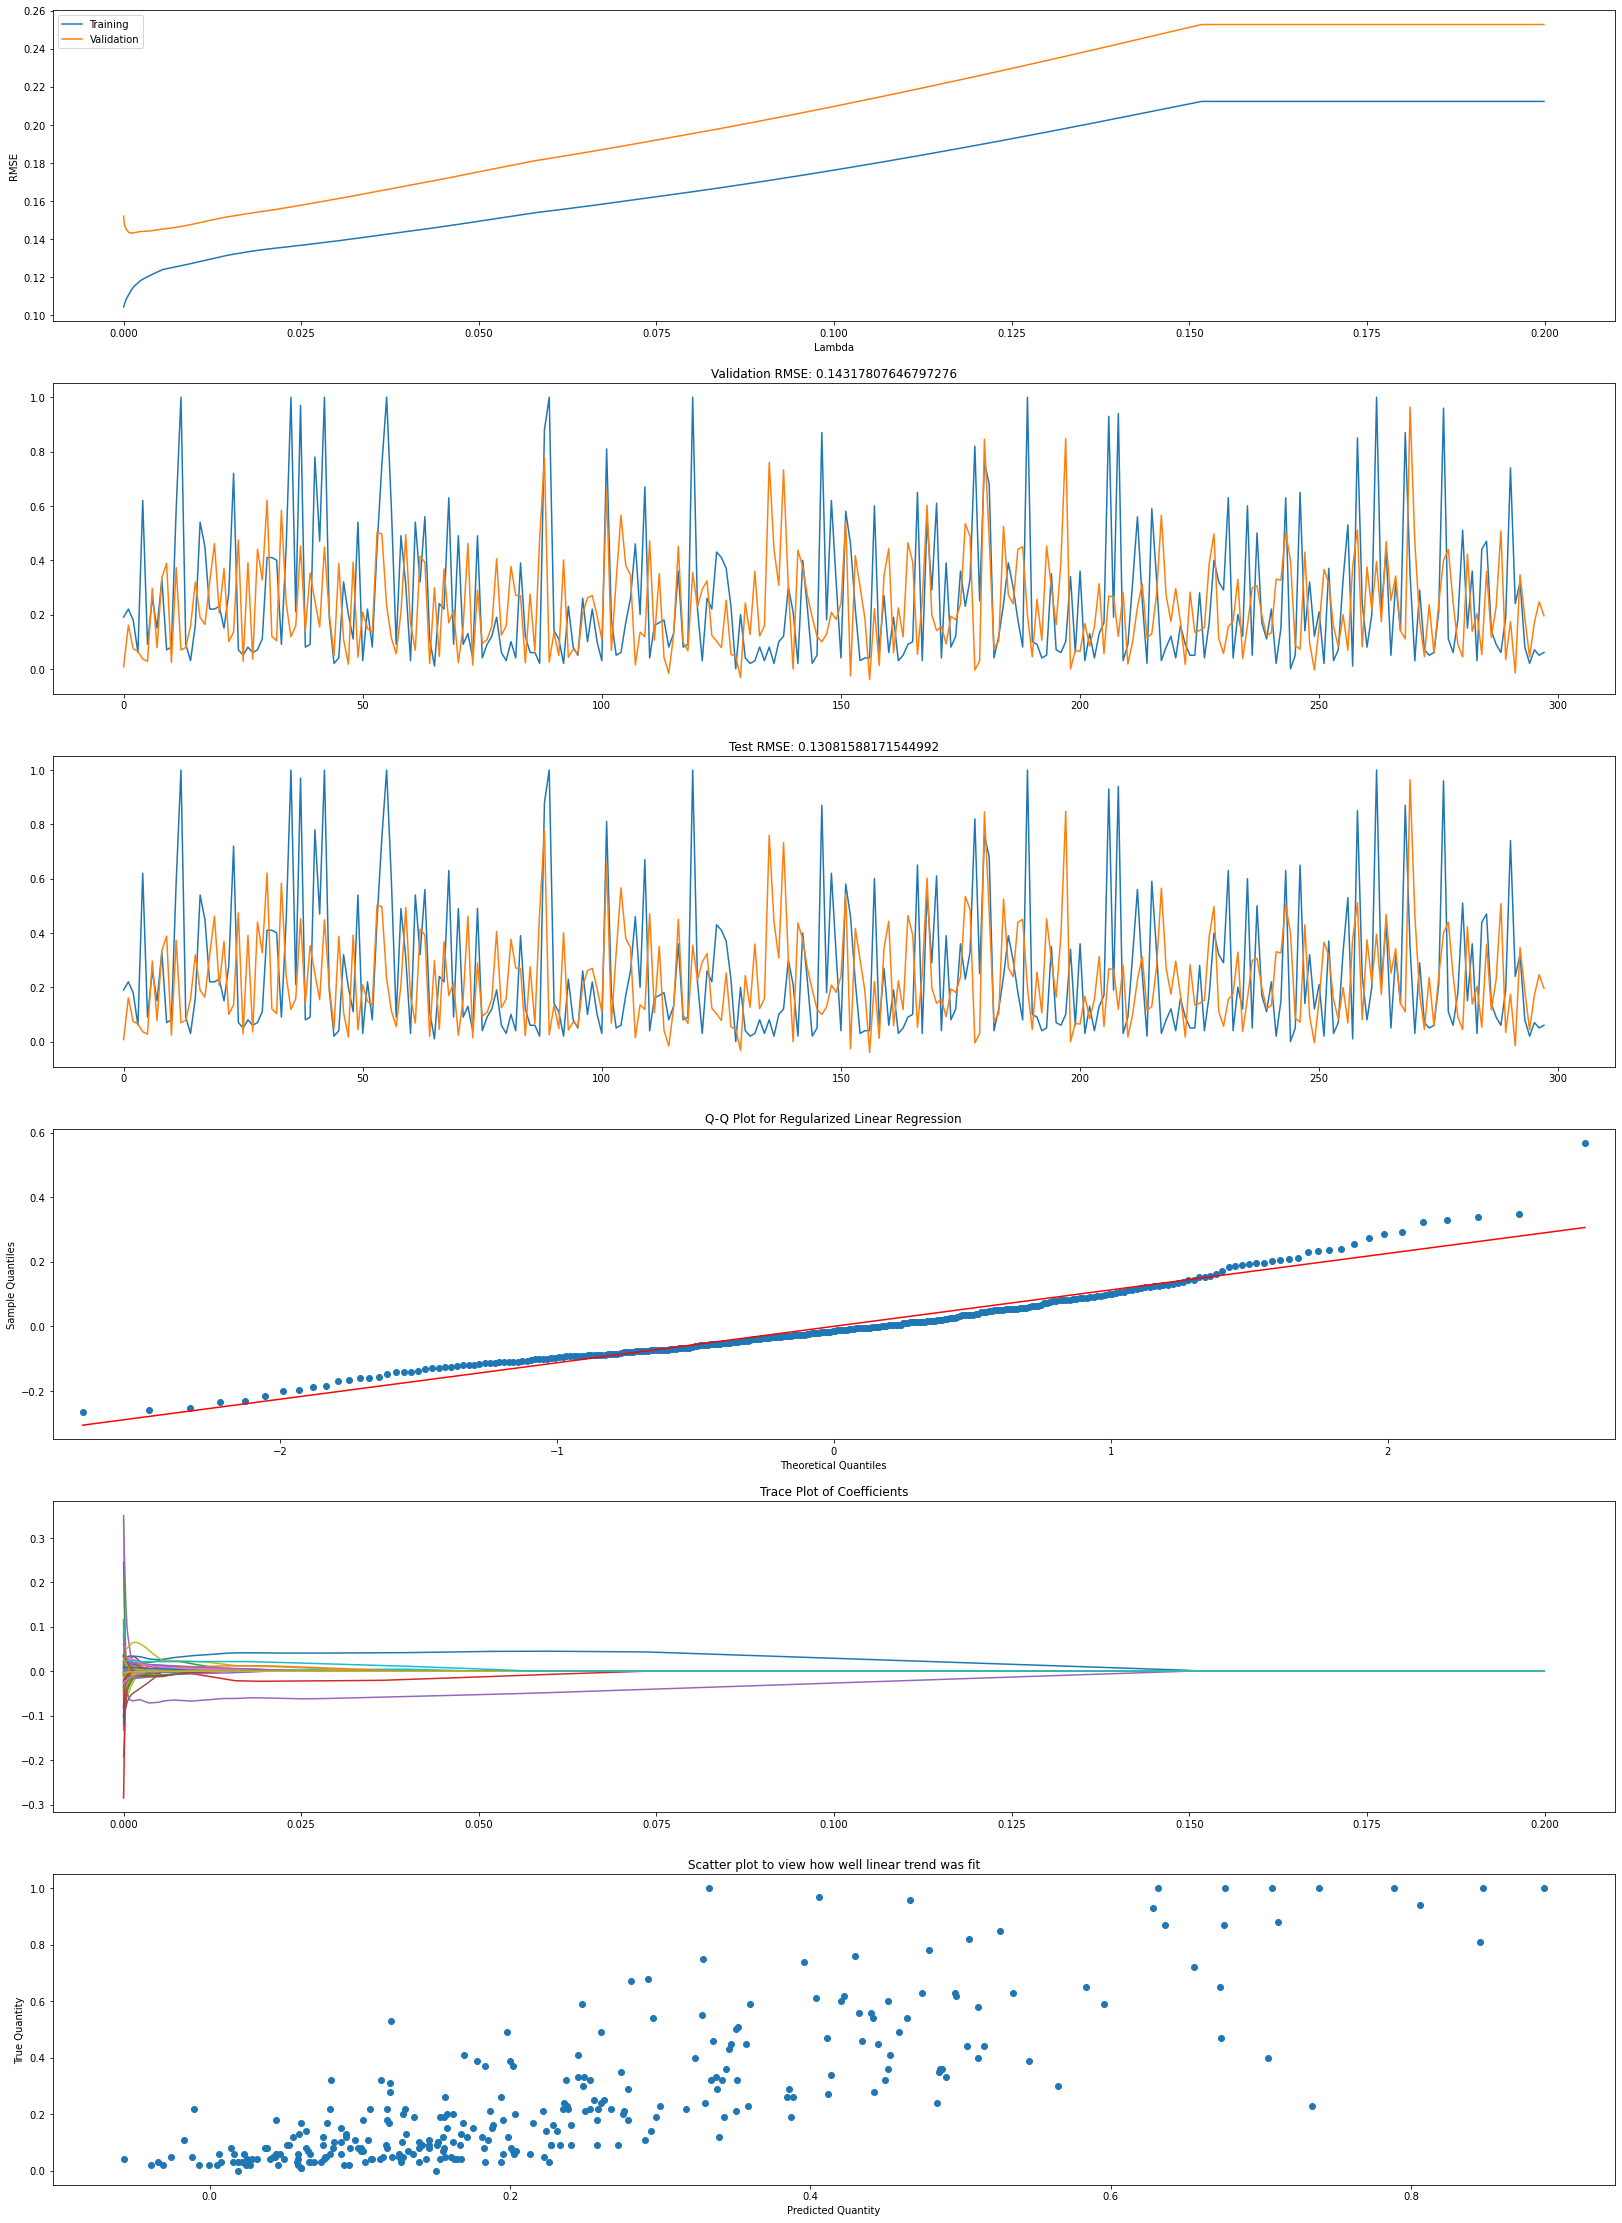

In [275]:
def evaluate_regularisation(X_train, Y_train, X_val, Y_val, X_test,Y_test ,lambda_list, L1_L2):
    # Ridge: L1_L2 = 0
    # Lasso: L1_L2 = 1
    best_lambda = -1
    best_RMSE = 10 ** 12
    best_coefficients = None
    best_clf = None

    RMSE_validation = []
    RMSE_train = []
    coefficients = [] # for trace plot

    for lambd in lambda_list:
        clf = None
        if L1_L2 == 0:
            clf = Ridge(alpha=lambd).fit(X=X_train, y=Y_train)
        elif L1_L2 == 1:
            clf = Lasso(alpha=lambd).fit(X=X_train, y=Y_train)

        train_pred = clf.predict(X_train)
        val_pred = clf.predict(X_val)

        RMSE_train.append(compute_RMSE(train_pred, Y_train))
        RMSE_validation.append(compute_RMSE(val_pred, Y_val))
        coefficients.append(clf.coef_)

        if RMSE_validation[-1] < best_RMSE:
            best_RMSE = RMSE_validation[-1]
            best_lambda = lambd
            best_coefficients = clf.coef_
            best_clf = clf

    print('Best values on Validation Data set')
    print(f"best lambda: {best_lambda}")
    print(f"Best val RMSE: {best_RMSE}")
    print(f"bets coefficients: {best_coefficients}")
    print(f"predictors: {X_train.columns[best_coefficients != 0]}")
    print(f"predictors removed: {X_train.columns[best_coefficients == 0]}")



     # now plotting some data

    train_pred = best_clf.predict(X_train)
    val_pred = best_clf.predict(X_val)
    test_pred = best_clf.predict(X_test)

    figure = plt.figure(figsize=[28,40])
    axe = figure.add_subplot(6,1,1)
    axe.plot(np.array(lambda_list), np.array(RMSE_train), label="Training")
    axe.plot(np.array(lambda_list), np.array(RMSE_validation), label="Validation")
    axe.set_xlabel("Lambda")
    axe.set_ylabel("RMSE")
    axe.legend()

    axe = figure.add_subplot(6,1,2)
    axe.plot(Y_val, label="Actual")
    axe.plot(train_pred, label="Prediction")
    axe.set_title(f"Validation RMSE: {compute_RMSE(val_pred, Y_val)}")

    axe = figure.add_subplot(6,1,3)
    axe.plot(Y_val, label="Actual")
    axe.plot(train_pred, label="Prediction")
    axe.set_title(f"Test RMSE: {compute_RMSE(test_pred, Y_test)}")

    # plotting the Q-Q plot
    axe = figure.add_subplot(6,1,4)

    resid = Y_train - train_pred
    sm.qqplot(resid, ax=axe, line='s')
    axe.set_title('Q-Q Plot for Regularized Linear Regression')


    axe = figure.add_subplot(6,1,5)
    axe.set_title("Trace Plot of Coefficients")
    axe.plot(lambda_list, coefficients)

    axe = figure.add_subplot(6,1,6)
    axe.scatter(best_clf.predict(X_val), Y_val)
    axe.set_title('Scatter plot to view how well linear trend was fit')
    axe.set_xlabel('Predicted Quantity')
    axe.set_ylabel('True Quantity')



# evaluate_regularisation(s_X_train, Y_train, s_X_val, Y_val,s_X_test, Y_test, lambda_list=np.arange(0, 0.5, 0.01), L1_L2=1)
evaluate_regularisation(s_X_train, Y_train, s_X_val, Y_val,s_X_test, Y_test, lambda_list=np.arange(0, 0.2, 0.0001), L1_L2=1)

   

## Lasso Regression

/tmp/ipykernel_6027/1565007348.py:18: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  clf = Lasso(alpha=lambd).fit(X=X_train, y=Y_train)
/opt/conda/envs/cab420-env/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/conda/envs/cab420-env/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.625e+00, tolerance: 1.343e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordin

Best values on Validation Data set
best lambda: 0.001
Best val RMSE: 0.14317807646797276
bets coefficients: [ 0.         -0.01905679  0.00889661 -0.01011219  0.         -0.05465222
 -0.          0.00207792  0.00746578  0.00570754  0.          0.01358994
  0.         -0.00923695  0.00115669 -0.01840125  0.01790579  0.00228028
 -0.02059549  0.          0.          0.          0.         -0.00575238
  0.02035257  0.00044077  0.01167324 -0.         -0.03587318 -0.
  0.          0.00015645 -0.01573938  0.03204033 -0.01769154 -0.
 -0.          0.         -0.00158025  0.         -0.00129165 -0.
  0.         -0.         -0.06479293 -0.00762647 -0.          0.01462629
 -0.02638966  0.01091012  0.03441124 -0.00565509 -0.01243771 -0.00826077
 -0.          0.01722813 -0.         -0.          0.          0.
 -0.          0.          0.00730959  0.          0.03415764 -0.01663506
  0.         -0.01990157  0.06017723  0.          0.          0.01158204
 -0.00967475 -0.          0.01865696 -0.00994502

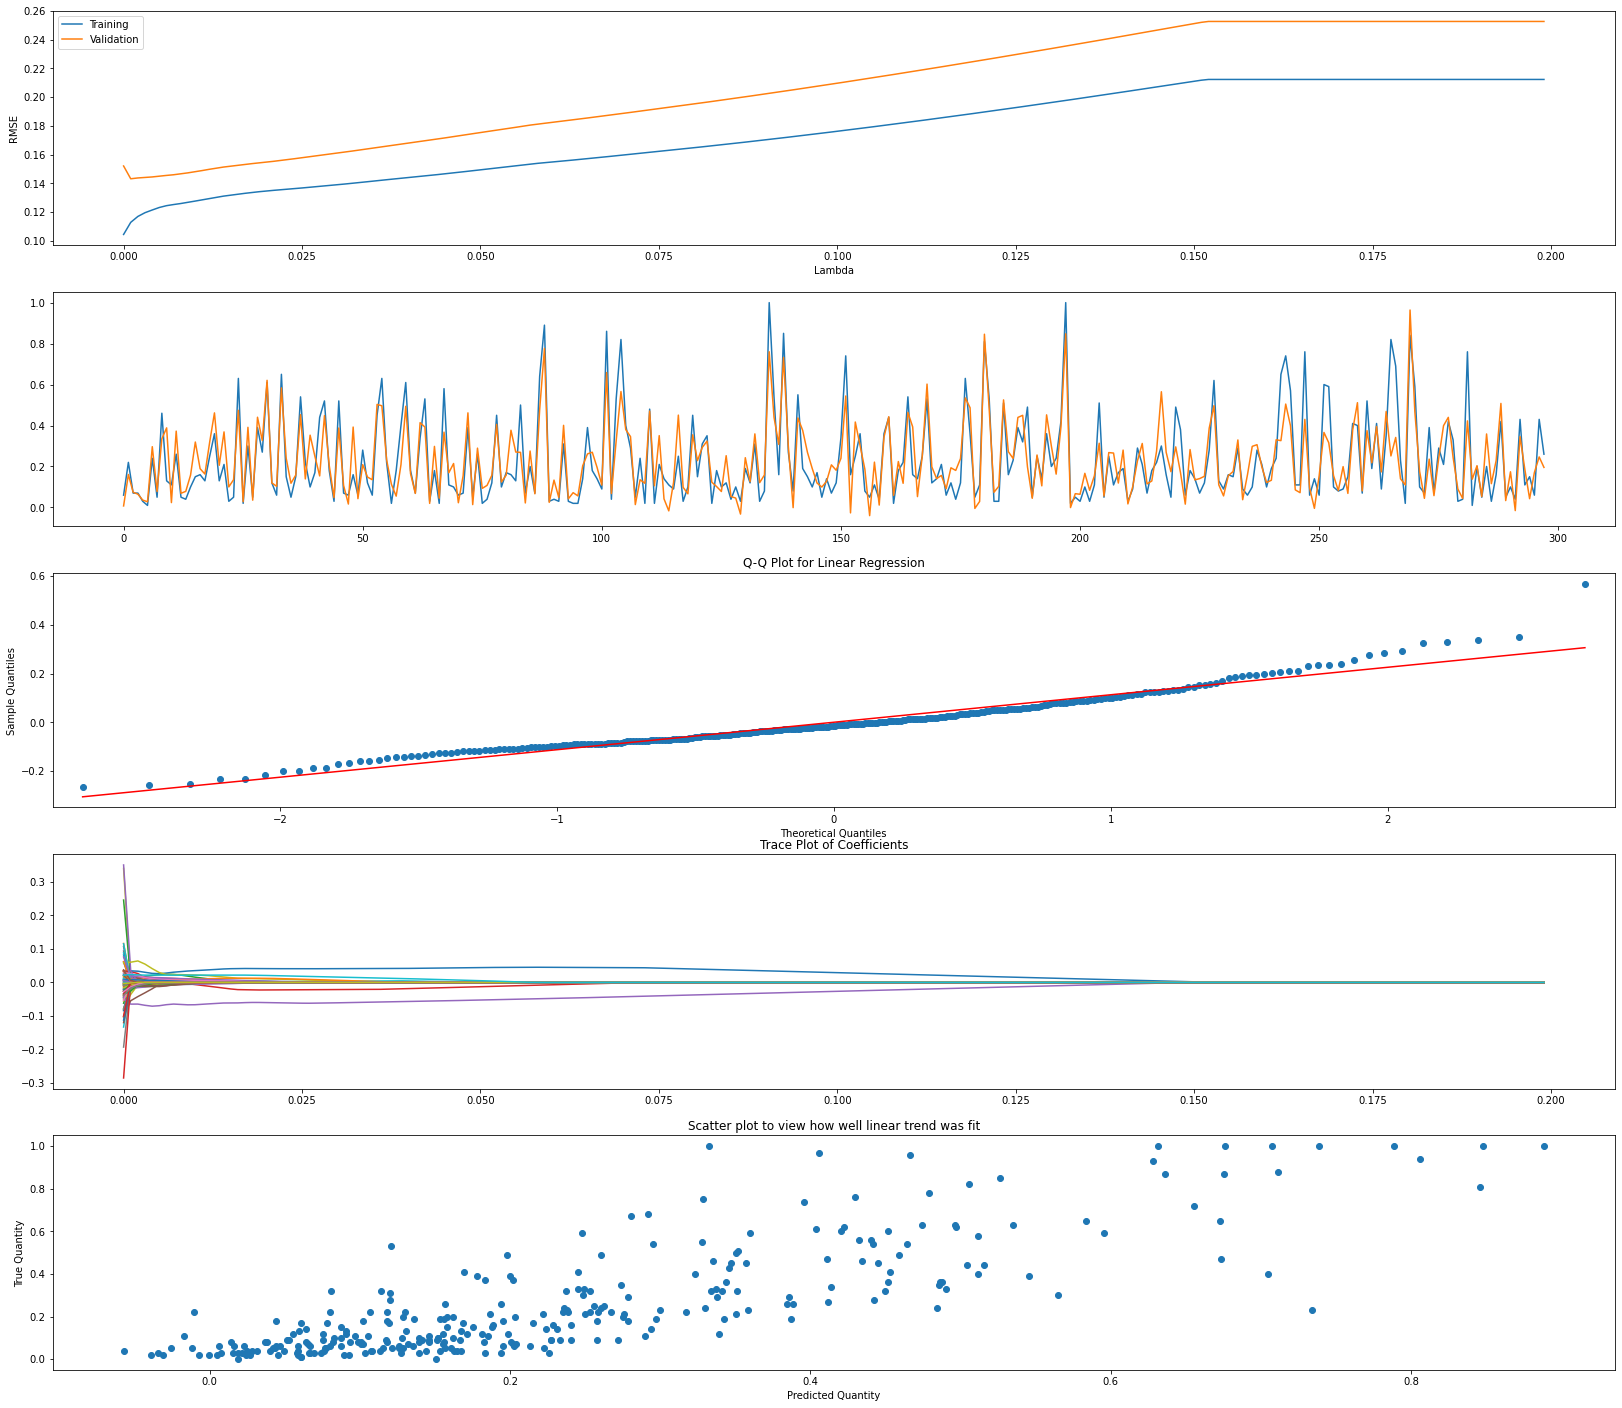

In [248]:
evaluate_regularisation(s_X_train, Y_train, s_X_val, Y_val, lambda_list=np.arange(0, 0.2, 0.001), L1_L2=1)




## Ridge Regression

Best values on Validation Data set
best lambda: 16.6
Best val RMSE: 0.142470168345969
bets coefficients: [ 1.42772800e-03 -1.82567348e-02  1.82784436e-02 -1.14506194e-02
  6.79493701e-05 -3.86672777e-02 -1.34476977e-02  9.97404190e-03
  1.45841058e-02  1.31411203e-02 -5.54173589e-05  1.59410722e-02
  1.16966514e-02 -1.11421636e-02  3.30516594e-03 -2.32521423e-02
  1.45599377e-02  1.01922469e-02 -1.84387980e-02  5.30369741e-03
  2.06246336e-03  1.14451542e-03 -2.29247610e-04 -7.52414204e-03
  1.88144845e-02  1.17421941e-03  1.10862107e-02 -5.02401452e-03
 -2.47169929e-02 -1.00936851e-02  7.10953680e-03  8.09549816e-03
 -2.15117472e-02  2.88387916e-02 -1.66884231e-02 -1.97849491e-03
  2.85266445e-03 -5.55337439e-03 -4.03249506e-03  1.87817222e-03
 -1.49487729e-03 -2.12856339e-03  1.48907117e-02 -2.13815251e-02
 -2.54776980e-02 -1.63643724e-02 -4.09302132e-03  1.34309801e-02
 -2.19212188e-02  1.29347658e-02  2.49740481e-02 -1.06955093e-02
 -8.53115587e-03 -8.37442797e-03 -6.80608788e-03  

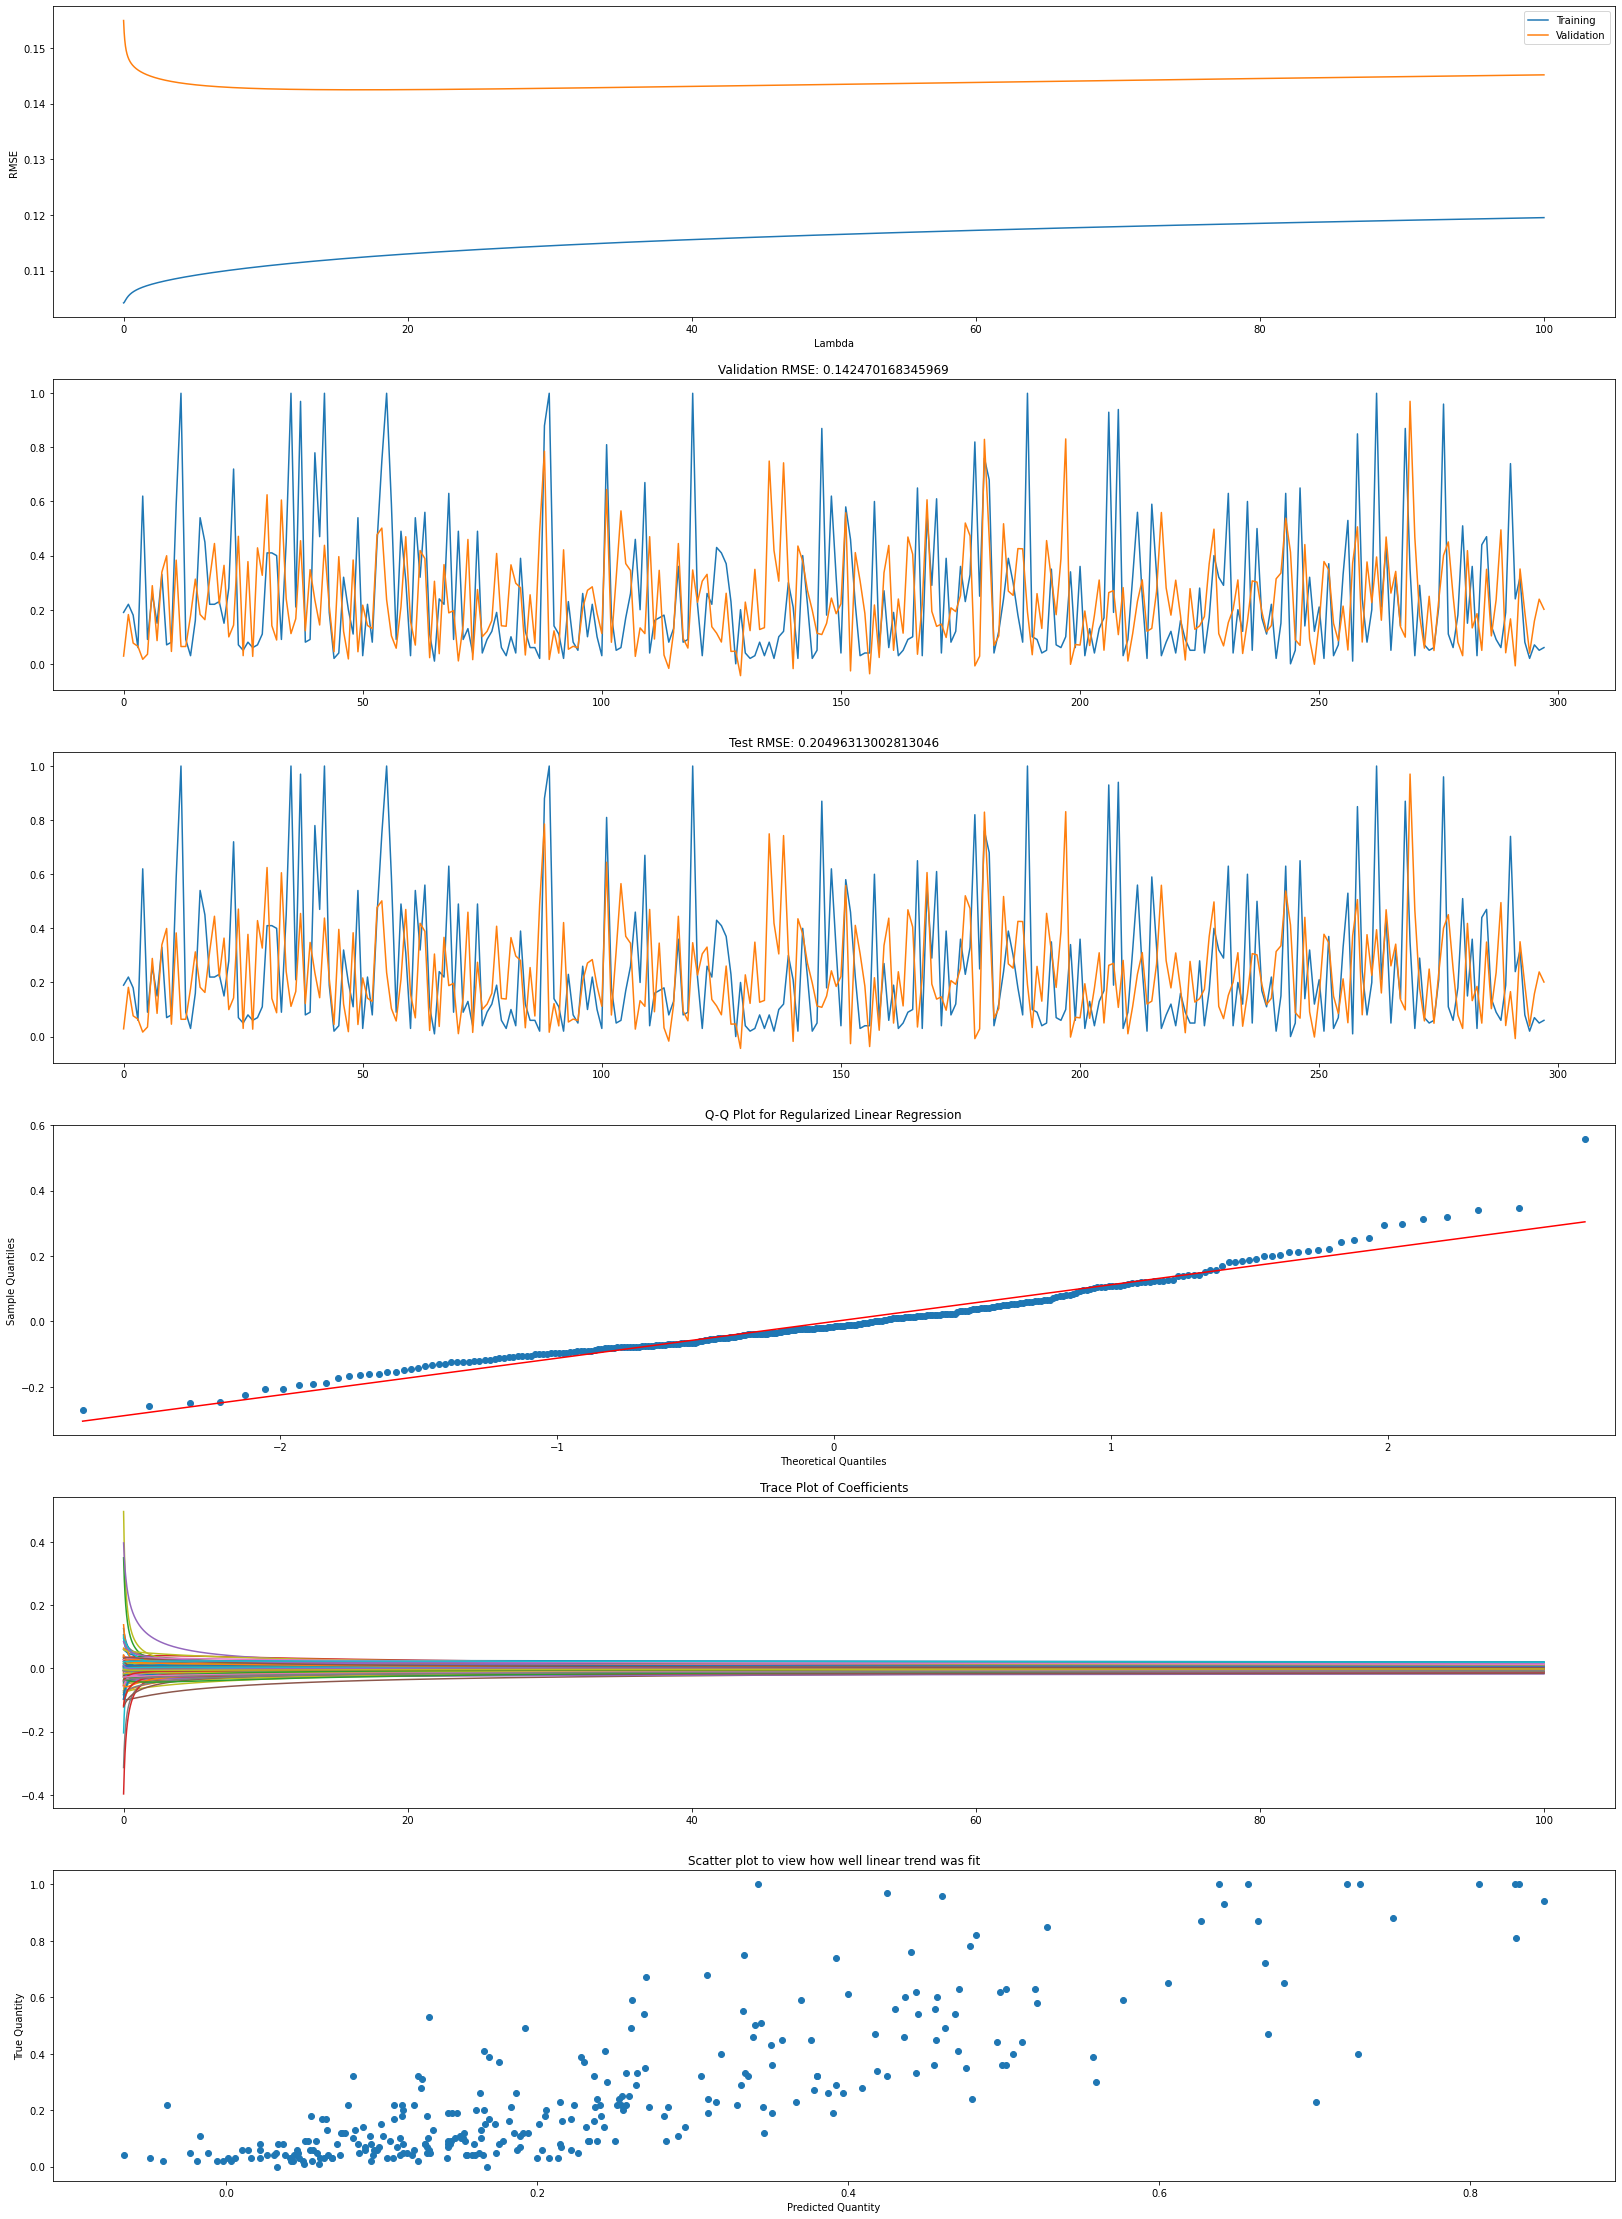

In [277]:
evaluate_regularisation(s_X_train, Y_train, s_X_val, Y_val,X_test, Y_test, lambda_list=np.arange(0, 100, 0.01), L1_L2=0)


Best values on Validation Data set
best lambda: 16.599
Best val RMSE: 0.14247016834273502
bets coefficients: [ 1.42776198e-03 -1.82573177e-02  1.82782230e-02 -1.14506492e-02
  6.77625555e-05 -3.86685372e-02 -1.34482534e-02  9.97455970e-03
  1.45846300e-02  1.31413730e-02 -5.56166258e-05  1.59411516e-02
  1.16972330e-02 -1.11425443e-02  3.30534280e-03 -2.32527254e-02
  1.45604238e-02  1.01923835e-02 -1.84389887e-02  5.30398634e-03
  2.06258499e-03  1.14420879e-03 -2.29080687e-04 -7.52418092e-03
  1.88146431e-02  1.17412757e-03  1.10861639e-02 -5.02418129e-03
 -2.47180141e-02 -1.00941161e-02  7.10986007e-03  8.09605512e-03
 -2.15121101e-02  2.88394720e-02 -1.66885485e-02 -1.97845788e-03
  2.85284462e-03 -5.55329064e-03 -4.03255039e-03  1.87824910e-03
 -1.49513673e-03 -2.12860866e-03  1.48912449e-02 -2.13817922e-02
 -2.54779847e-02 -1.63642566e-02 -4.09293629e-03  1.34313648e-02
 -2.19219803e-02  1.29349603e-02  2.49740405e-02 -1.06955912e-02
 -8.53115629e-03 -8.37451238e-03 -6.80638516e-

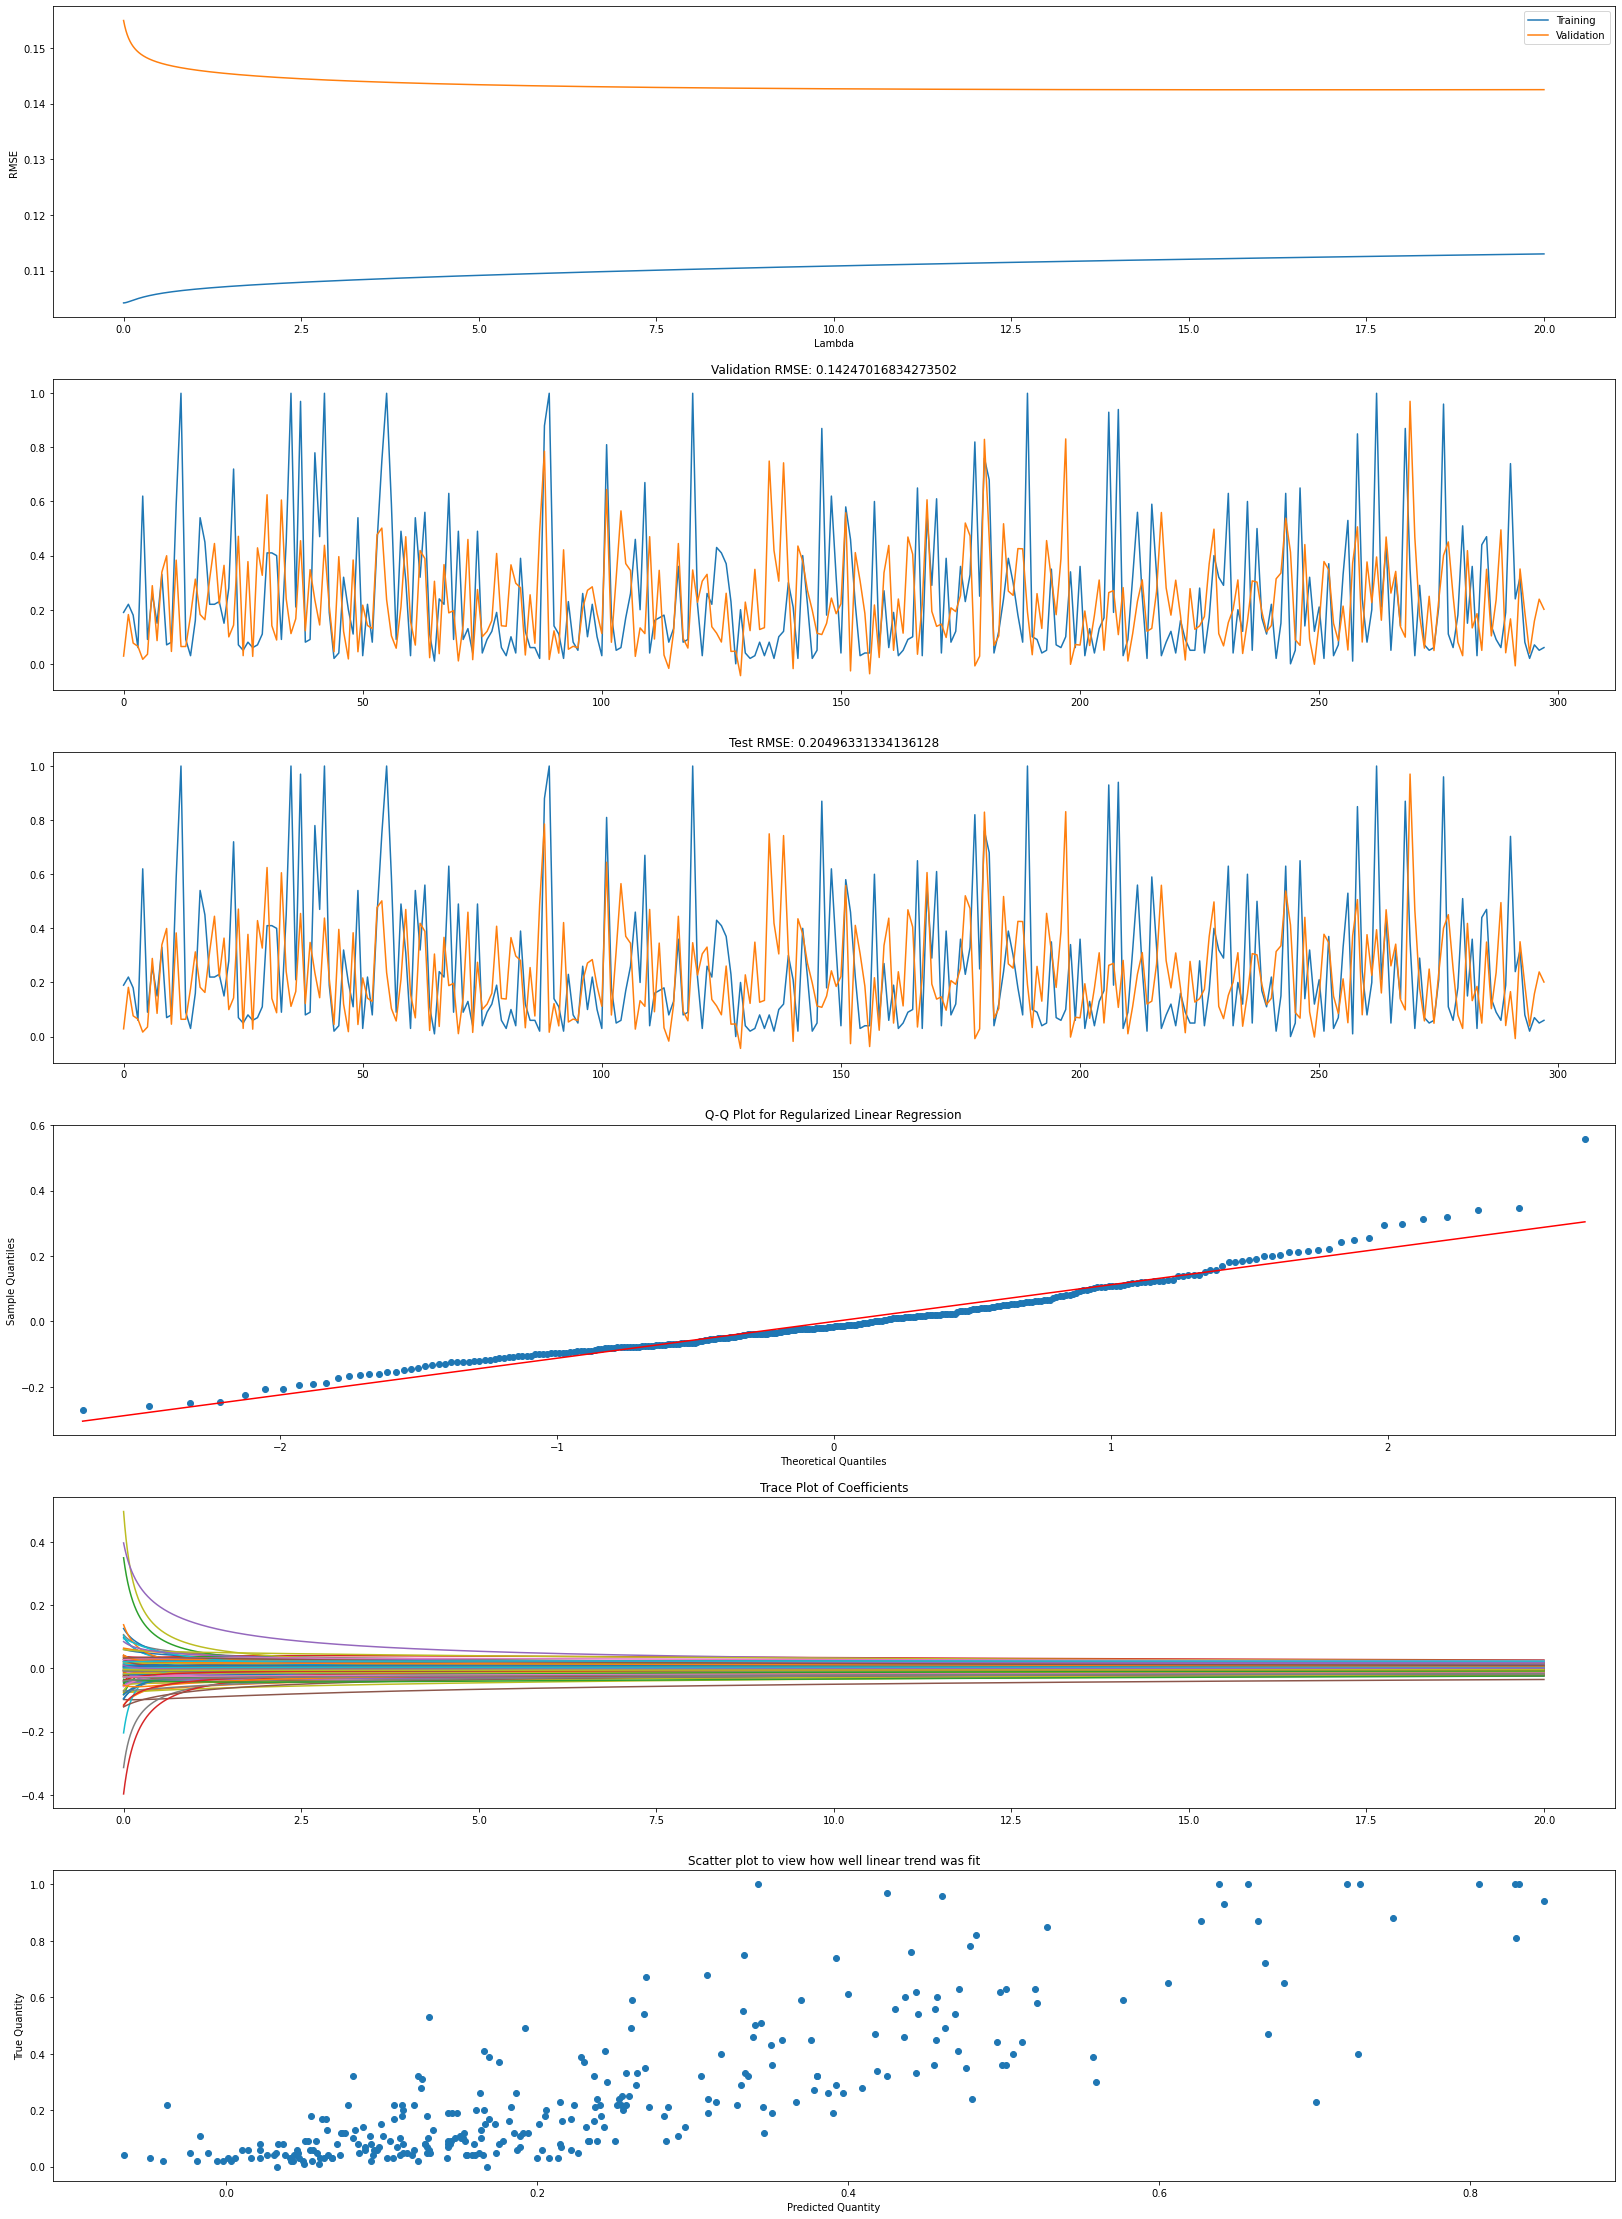

In [279]:
evaluate_regularisation(s_X_train, Y_train, s_X_val, Y_val,X_test, Y_test, lambda_list=np.arange(0, 20, 0.001), L1_L2=0)
